In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv("biometria.csv")
df.head()

Esporte  Altura (m)  Peso (kg)
0       V        1.90         76
1       V        1.98         70
2       V        2.04        101
3       V        1.88         77
4       V        2.14        109

In [7]:
df.groupby("Esporte").describe()

Altura (m)                                                       \
             count      mean       std   min    25%   50%     75%   max   
Esporte                                                                   
F             23.0  1.813478  0.070878  1.63  1.765  1.81  1.8700  1.93   
V             22.0  1.986818  0.081497  1.85  1.925  1.98  2.0475  2.14   

        Peso (kg)                                                        
            count       mean        std   min    25%   50%   75%    max  
Esporte                                                                  
F            23.0  75.000000   7.537784  60.0  69.50  76.0  79.5   88.0  
V            22.0  86.863636  10.273848  70.0  78.25  85.5  93.0  109.0

<AxesSubplot:xlabel='Altura (m)', ylabel='Count'>

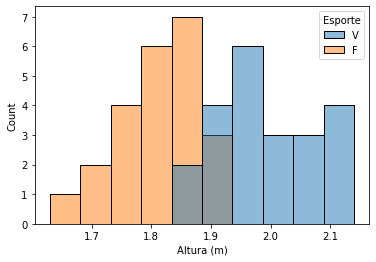

In [8]:
sns.histplot(data=df, bins=10, x='Altura (m)', hue='Esporte')

<AxesSubplot:xlabel='Peso (kg)', ylabel='Count'>

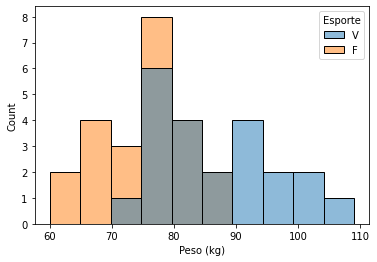

In [9]:
sns.histplot(data=df, bins=10, x='Peso (kg)', hue='Esporte')

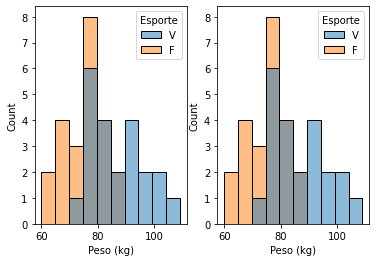

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for idx, esport in enumerate(["Peso (kg)", "Altura (m)"]):
    sns.histplot(data=df, bins=10, x='Peso (kg)', hue='Esporte', ax=axes[idx])

In [11]:
l = ['a','b','c']
for idx, letra in enumerate(l):
    print(idx, letra)

0 a
1 b
2 c


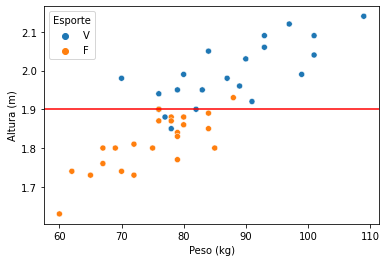

In [20]:
sns.scatterplot(data=df, x='Peso (kg)', y='Altura (m)', hue='Esporte')
plt.axhline(1.9, color='red', label='limiar')

In [39]:
def classificador_limiar(limiar, dados, coluna, rotulos=["F", "V"]):
    predicoes = []
    for idx, dado in dados.iterrows():
        if dado[coluna] < limiar:
            predicoes.append(rotulos[0])
        else:
            
            predicoes.append(rotulos[1])
    return pd.DataFrame(predicoes, columns=['Esporte'])

In [43]:
pred = classificador_limiar(1.9, df[['Altura (m)', 'Peso (kg)']], 'Altura (m)')

In [45]:
# for gab, p in zip(df['Esporte'].values, pred.values):
#     print(gab, p)

In [47]:
def comparar_resultados(predicoes, gabarito, rotulo):
    predicoes = predicoes.values
    gabarito = gabarito.values
    acertos = 0
    erros = 0
    
    for gab, pred in zip(gabarito, predicoes):
        if gab == rotulo:
            if gab == pred:
                acertos+=1
            else:
                erros+=1
    return acertos, erros

In [53]:
res_futebol = comparar_resultados(pred['Esporte'], df['Esporte'], 'F')
res_volei = comparar_resultados(pred['Esporte'], df['Esporte'], 'V')

res_futebol, res_volei

((21, 2), (20, 2))

In [55]:
def acuracia(acertos, total_instacias):
        return acertos/total_instacias

In [56]:
print(acuracia(res_futebol[0], res_futebol[0] + res_futebol[1]))

0.9130434782608695


In [57]:
print(acuracia(res_volei[0], res_volei[0] + res_volei[1]))

0.9090909090909091


In [60]:
print("%.2f" % acuracia(res_volei[0]+res_futebol[0], len(pred)))

0.91


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Esporte'], pred['Esporte'])

0.9111111111111111

In [63]:
n_limiares = 100
limiares = np.linspace(1.7, 2.2, n_limiares)
acuracias = []

melhor_limiar = limiares[0]
melhor_acuracia = 0

for limiar in limiares:
    predicoes = classificador_limiar(limiar, df, 'Altura (m)')
    
    acuracia = accuracy_score(df['Esporte'], predicoes['Esporte'])
    acuracias.append(acuracia)
    
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar
print("Melhor limiar: %.2f, Melhor acuráracia: %.2f" % (melhor_limiar, melhor_acuracia))

Melhor limiar: 1.89, Melhor acuráracia: 0.91


Text(0, 0.5, 'Acurárica')

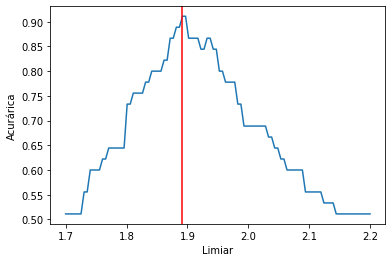

In [64]:
fig, axes = plt.subplots()
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel("Limiar")
axes.set_ylabel("Acurárica")